### Features

In [ ]:
# type: The type of property (e.g., single-family home, condo).
# text: A textual description of the property.
# year_built: The year in which the property was constructed.
# beds: The number of bedrooms.
# baths: Total number of bathrooms (including full and half).
# baths_full: Number of full bathrooms.
# baths_half: Number of half bathrooms.
# garage: Garage capacity (number of cars).
# lot_sqft: Size of the lot in square feet.
# sqft: Living area size in square feet.
# stories: Number of stories/floors in the property.
# lastSoldPrice: The price at which the property was last sold.
# soldOn: The date on which the property was last sold.
# listPrice: The listing price of the property at the time of data collection.
# status: The current status of the listing (e.g., for sale, sold).


#### Library Import

In [ ]:
# Importing required libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For making statistical graphics

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings to keep the output clean

# Configuring pandas to display all columns in the output
pd.set_option('display.max_columns', None)  # Ensures all columns of a DataFrame are displayed without truncation


#### Data Reading

In [ ]:
# Read the CSV file containing real estate data into a pandas DataFrame
df = pd.read_csv('/content/raw_data/real_estate_data_chicago.csv')

# Display a random sample of 5 rows from the DataFrame
# This helps in quickly inspecting the structure and content of the data
df.sample(5)

FileNotFoundError: [Errno 2] No such file or directory: '/content/real_estate_data_chicago.csv'

#### About data

In [ ]:
# Displaying the dimensions of the DataFrame in terms of rows and columns
df.shape


In [ ]:
# Display the column names of the DataFrame
df.columns


In [ ]:
# The df.nunique() method is used to calculate the number of unique values in each column of the DataFrame.
# It returns a Series with the column names as the index and the count of unique values in each column as the values.
df.nunique()


,0
type,7
text,1981
year_built,149
beds,14
baths,13
baths_full,8
baths_half,5
garage,10
lot_sqft,444
sqft,679


In [ ]:
# Displaying a concise summary of the DataFrame, including the number of non-null entries in each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           2000 non-null   object 
 1   text           1992 non-null   object 
 2   year_built     1790 non-null   float64
 3   beds           1940 non-null   float64
 4   baths          1999 non-null   float64
 5   baths_full     1937 non-null   float64
 6   baths_half     592 non-null    float64
 7   garage         1282 non-null   float64
 8   lot_sqft       992 non-null    float64
 9   sqft           1447 non-null   float64
 10  stories        1620 non-null   float64
 11  lastSoldPrice  1415 non-null   float64
 12  soldOn         1415 non-null   object 
 13  listPrice      1994 non-null   float64
 14  status         2000 non-null   object 
dtypes: float64(11), object(4)
memory usage: 234.5+ KB


In [ ]:
# Get the number of rows in the dataframe
len(df)


2000

#### Data Cleaning

###### Treating Duplicate Values

In [ ]:
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1998, 15)

###### Treating 'soldOn' column

In [ ]:
# Convert the 'soldOn' column to datetime format
df['soldOn'] = pd.to_datetime(df['soldOn'])

# Display the DataFrame's information including column types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   type           1998 non-null   object        
 1   text           1990 non-null   object        
 2   year_built     1790 non-null   float64       
 3   beds           1940 non-null   float64       
 4   baths          1997 non-null   float64       
 5   baths_full     1937 non-null   float64       
 6   baths_half     592 non-null    float64       
 7   garage         1282 non-null   float64       
 8   lot_sqft       990 non-null    float64       
 9   sqft           1447 non-null   float64       
 10  stories        1620 non-null   float64       
 11  lastSoldPrice  1413 non-null   float64       
 12  soldOn         1413 non-null   datetime64[ns]
 13  listPrice      1992 non-null   float64       
 14  status         1998 non-null   object        
dtypes: datetime64[ns](1), floa

In [ ]:
# Select specific columns from the dataframe 'df' to keep
df = df[['type', 'year_built', 'beds', 'baths', 'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldPrice', 'soldOn', 'listPrice']]

# Display a random sample of 5 rows from the updated dataframe
df.sample(5)


,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice
670,land,NaN,NaN,0.0,NaN,3049.0,NaN,NaN,NaN,NaT,30000.0
1926,single_family,1948.0,3.0,3.0,1.0,5456.0,1359.0,2.0,237500.0,2021-07-22,550000.0
440,townhomes,2005.0,2.0,2.0,2.0,1875.0,1285.0,3.0,285000.0,2021-07-13,325000.0
1663,single_family,1898.0,3.0,2.0,NaN,2940.0,1400.0,1.0,92500.0,2017-09-07,219900.0
357,single_family,1910.0,4.0,2.0,NaN,3149.0,1500.0,2.0,100000.0,2023-05-05,402000.0


#### Creating Age column

In [ ]:
# Calculate the age of each entry by subtracting the 'year_built' from the current year (2024)
df['age'] = 2024 - df['year_built']

# Display a random sample of 5 rows from the dataframe to view the data
df.sample(5)


,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age
1018,condos,1930.0,3.0,2.0,1.0,NaN,NaN,3.0,182000.0,2001-03-02,210000.0,94.0
1360,condos,NaN,2.0,2.0,2.0,NaN,1500.0,39.0,84000.0,1995-09-13,320000.0,NaN
128,condos,1907.0,2.0,1.0,NaN,NaN,NaN,4.0,364000.0,2008-11-18,385000.0,117.0
1729,single_family,2017.0,4.0,4.0,2.0,2378.0,2875.0,3.0,855000.0,2020-12-30,974900.0,7.0
1268,condos,1955.0,1.0,1.0,1.0,NaN,NaN,21.0,133000.0,2021-07-15,180000.0,69.0


#### Missing Values

In [ ]:
# Filter rows with any NaN values
# Select a random sample of 5 rows from the filtered DataFrame
df[df.isna().any(axis=1)].sample(5)


,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age
855,multi_family,1916.0,4.0,3.0,1.0,3750.0,NaN,NaN,20000.0,2010-06-22,39500.0,108.0
897,single_family,NaN,4.0,3.0,2.0,NaN,2867.0,NaN,450000.0,2004-01-21,715000.0,NaN
1921,single_family,1900.0,4.0,3.0,2.0,NaN,1535.0,2.0,47000.0,1981-09-30,790000.0,124.0
1886,condos,2003.0,1.0,1.0,1.0,NaN,NaN,8.0,235000.0,2013-10-07,305000.0,21.0
141,multi_family,1915.0,5.0,2.0,NaN,2614.0,NaN,NaN,79000.0,1996-04-24,171000.0,109.0


In [ ]:
# This code calculates the total number of missing (NaN) values in each column of the DataFrame.
df.isna().sum()


,0
type,0
year_built,208
beds,58
baths,1
garage,716
lot_sqft,1008
sqft,551
stories,378
lastSoldPrice,585
soldOn,585


In [ ]:
# Calculate the percentage of missing (null) values for each column in the dataframe
round((df.isnull().sum()) / (len(df)) * 100, 2)


,0
type,0.00
year_built,10.41
beds,2.90
baths,0.05
garage,35.84
lot_sqft,50.45
sqft,27.58
stories,18.92
lastSoldPrice,29.28
soldOn,29.28


#### Missing values in detail

##### type

In [ ]:
# The code snippet calculates and displays the count of each unique value in the 'type' column of the DataFrame.
df['type'].value_counts()


,count
type,
single_family,931
condos,716
multi_family,212
townhomes,78
land,58
mobile,2
apartment,1


In [ ]:
# Filter the DataFrame to include only rows where the 'type' column has the value 'apartment'
df[df['type'] == 'apartment']


,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age
448,apartment,1875.0,4.0,2.0,NaN,3049.0,NaN,2.0,75000.0,2003-03-05,224900.0,149.0


In [ ]:
# Filter the DataFrame 'df' to include only the rows where the 'type' column has values 'apartment' or 'mobile'.
df[df['type'].isin(['apartment', 'mobile'])]


,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age
208,mobile,2018.0,3.0,2.0,NaN,2250.0,NaN,NaN,NaN,NaT,90000.0,6.0
448,apartment,1875.0,4.0,2.0,NaN,3049.0,NaN,2.0,75000.0,2003-03-05,224900.0,149.0
614,mobile,2022.0,2.0,2.0,NaN,1400.0,NaN,NaN,NaN,NaT,64900.0,2.0


##### year_built

In [ ]:
# Filter the rows where 'year_built' is null and get the 'type' column
df[df['year_built'].isnull()]['type'].unique()


array(['single_family', 'condos', 'multi_family', 'land', 'townhomes'],
      dtype=object)

##### beds

In [ ]:
# This line filters the dataframe 'df' to include only the rows where the 'beds' column is null.
# Then, it accesses the 'type' column of these filtered rows and retrieves the unique values.
df[df['beds'].isnull()]['type'].unique()


array(['land'], dtype=object)

##### baths

In [ ]:
# Select rows where the 'baths' column has missing values (NaN)
# Then, from those rows, retrieve the unique values from the 'type' column
df[df['baths'].isnull()]['type'].unique()


array(['single_family'], dtype=object)

##### garage

In [ ]:
# Select rows where the 'garage' column is null
# Then, get the unique values from the 'type' column of those rows
df[df['garage'].isnull()]['type'].unique()


array(['single_family', 'multi_family', 'condos', 'townhomes', 'mobile',
       'land', 'apartment'], dtype=object)

In [ ]:
# Counting the number of occurrences of each unique value in the 'garage' column
df['garage'].value_counts()


,count
garage,
2.0,759
1.0,445
3.0,50
4.0,21
5.0,2
36.0,1
400.0,1
7.0,1
75.0,1


In [ ]:
# Filter the rows where the 'garage' column has values 400.0, 75.0, or 36.0
df[df['garage'].isin([400.0, 75.0, 36.0])]


,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age
99,condos,2006.0,1.0,1.0,36.0,NaN,NaN,7.0,NaN,NaT,329900.0,18.0
920,condos,1968.0,3.0,4.0,400.0,NaN,2985.0,70.0,NaN,NaT,1295000.0,56.0
1285,condos,1912.0,1.0,1.0,75.0,NaN,713.0,7.0,167500.0,2000-09-19,245000.0,112.0


In [ ]:
# Filter the dataframe to include only rows where 'type' column is equal to 'condos'
# Then, from the filtered data, access the 'garage' column
# Finally, return the unique values from the 'garage' column
df[df['type']=='condos']['garage'].unique()


array([ nan,   2.,   1.,  36.,   3.,   4., 400.,   7.,  75.,   8.])

##### lot_sqft

In [ ]:
# Selecting rows from the DataFrame where the 'lot_sqft' column has null (missing) values
# Then, accessing the 'type' column from those rows
# Finally, obtaining the unique values from the 'type' column
df[df['lot_sqft'].isnull()]['type'].unique()


array(['single_family', 'condos', 'townhomes', 'multi_family', 'land'],
      dtype=object)

##### sqft

In [ ]:
# Filtering the rows in the DataFrame where the 'sqft' column has missing (null) values
# Then selecting the 'type' column from those filtered rows
# Finally, retrieving the unique values from the 'type' column for those rows
df[df['sqft'].isnull()]['type'].unique()


array(['single_family', 'multi_family', 'condos', 'mobile', 'land',
       'townhomes', 'apartment'], dtype=object)

##### stories

In [ ]:
# This code performs the following steps:
# 1. Selects rows from the DataFrame `df` where the column `stories` has missing (null) values using `df['stories'].isnull()`.
# 2. Filters only the `type` column from these selected rows.
# 3. Extracts the unique values from the `type` column of the filtered rows using `.unique()`.
df[df['stories'].isnull()]['type'].unique()


array(['single_family', 'multi_family', 'condos', 'mobile', 'land'],
      dtype=object)

##### listPrice

In [ ]:
# This code filters the rows of the DataFrame `df` where the column `listPrice` has null (missing) values.
df[df['listPrice'].isnull()]


,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age
665,land,NaN,NaN,0.0,NaN,3920.0,NaN,NaN,10000.0,2019-02-14,NaN,NaN
1238,multi_family,1909.0,6.0,2.0,2.0,NaN,NaN,NaN,NaN,NaT,NaN,115.0
1255,single_family,1937.0,4.0,2.0,1.0,3772.0,1542.0,2.0,230000.0,2020-02-13,NaN,87.0
1324,townhomes,1946.0,2.0,1.0,2.0,2670.0,940.0,2.0,89000.0,2002-03-05,NaN,78.0
1676,single_family,1926.0,3.0,2.0,2.0,4835.0,1176.0,2.0,195000.0,2014-12-16,NaN,98.0
1701,multi_family,1927.0,9.0,3.0,3.0,4356.0,NaN,NaN,180000.0,1997-12-01,NaN,97.0


#### Correlation Matrix

##### Heatmap

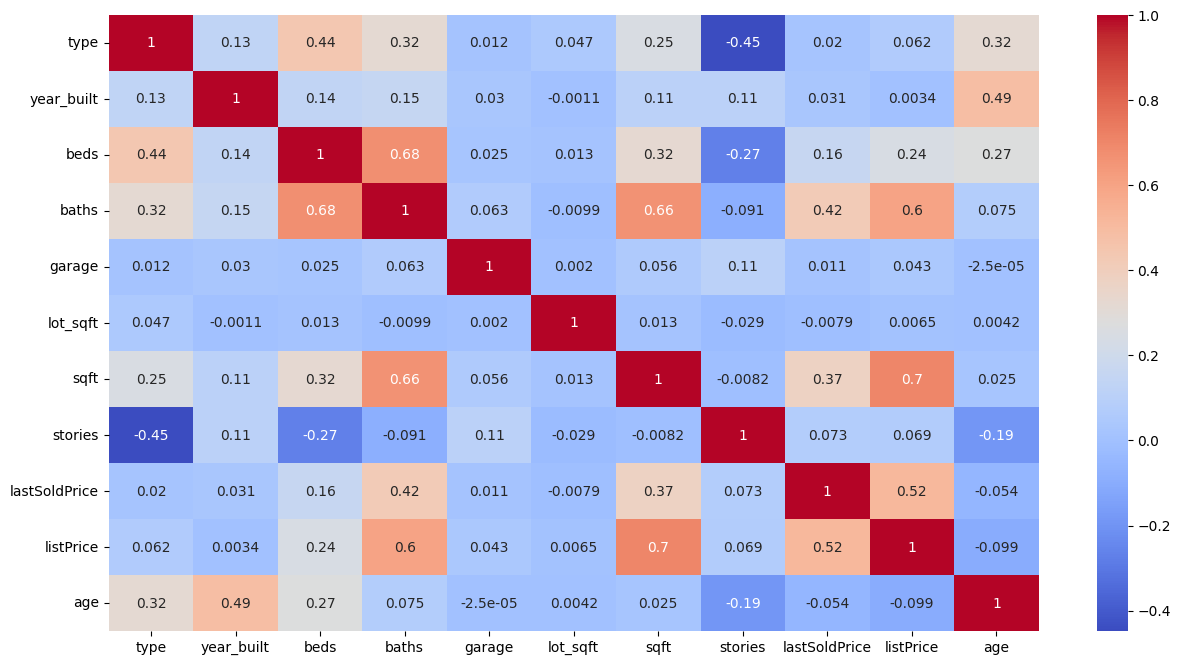

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()  # Create a copy of the original dataframe
le =LabelEncoder()  # Initialize LabelEncoder
df_copy['type'] = le.fit_transform(df_copy['type'])  # Encode 'type' column

df_heatmap = df_copy.drop(columns=['soldOn'])  # Drop 'soldOn' column
df_heatmap = df_heatmap.fillna(0)  # Replace NaN values with 0
corr_matrix = df_heatmap.corr()  # Calculate correlation matrix

# Set the figure size
plt.figure(figsize=(15, 8))

# Create a heatmap from the correlation matrix with annotations and a color map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

#### Visualization to check distribution of each feature

##### Histogram with KDE

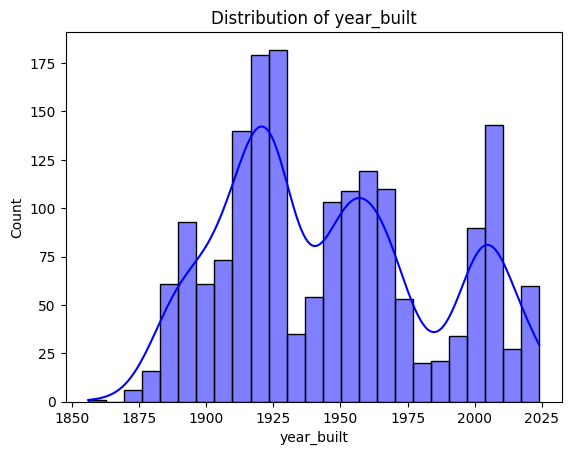

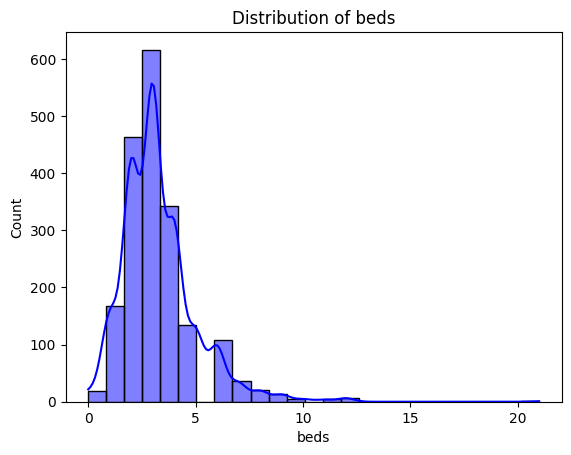

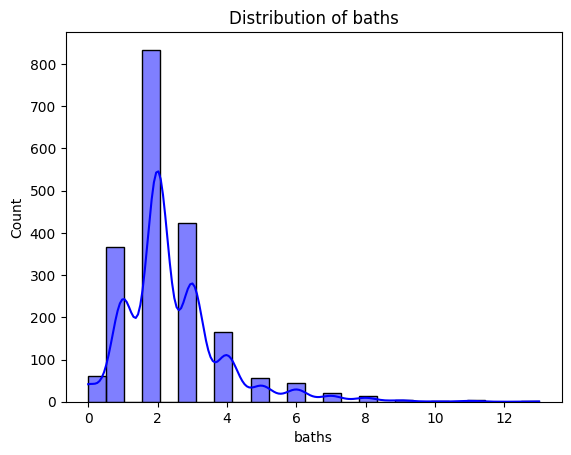

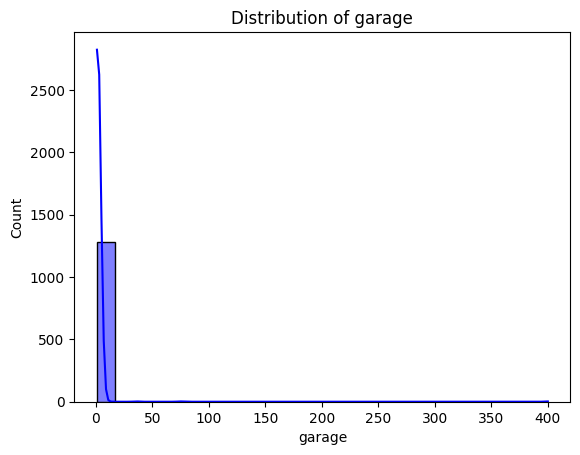

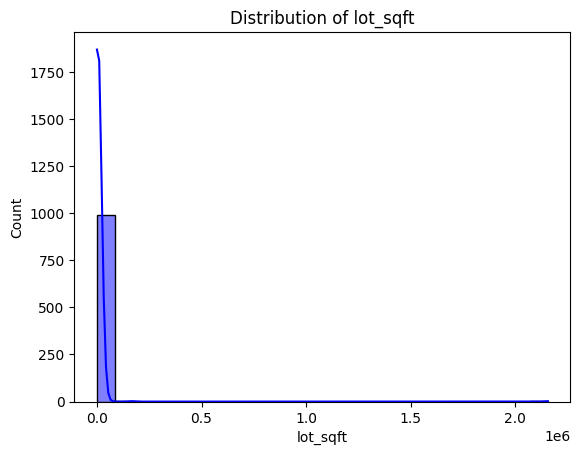

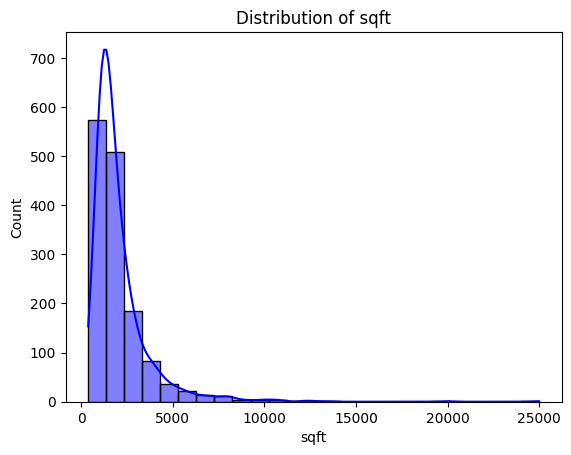

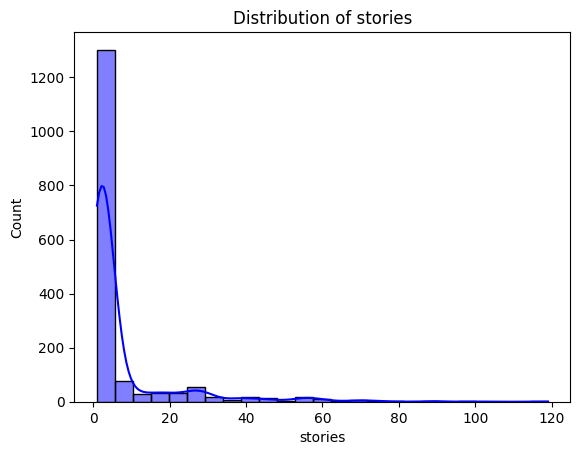

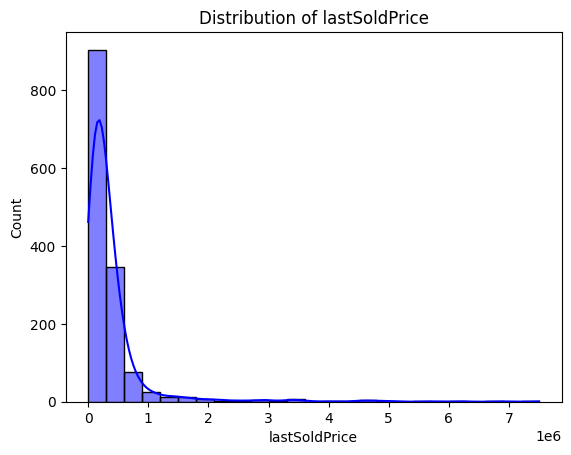

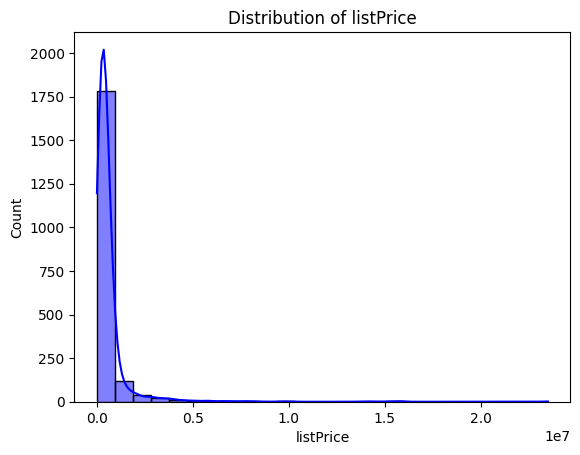

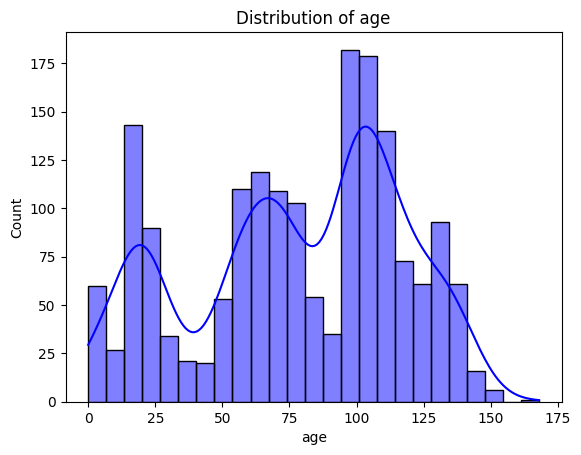

In [ ]:
df_copy = df.copy()

# Create a list of features excluding 'soldOn' and 'type'
cont_features = [feature for feature in df_copy.columns if feature not in ['soldOn', 'type']]

# Loop through the selected features to plot histograms
for feature in cont_features:
  # Plot histogram with KDE (Kernel Density Estimate)
  sns.histplot(data=df_copy, x=feature, bins=25, kde=True, color="blue")
  # Label the x-axis
  plt.xlabel(feature)
  # Label the y-axis
  plt.ylabel("Count")
  # Set the title of the plot
  plt.title(f"Distribution of {feature}")
  # Show the plot
  plt.show()


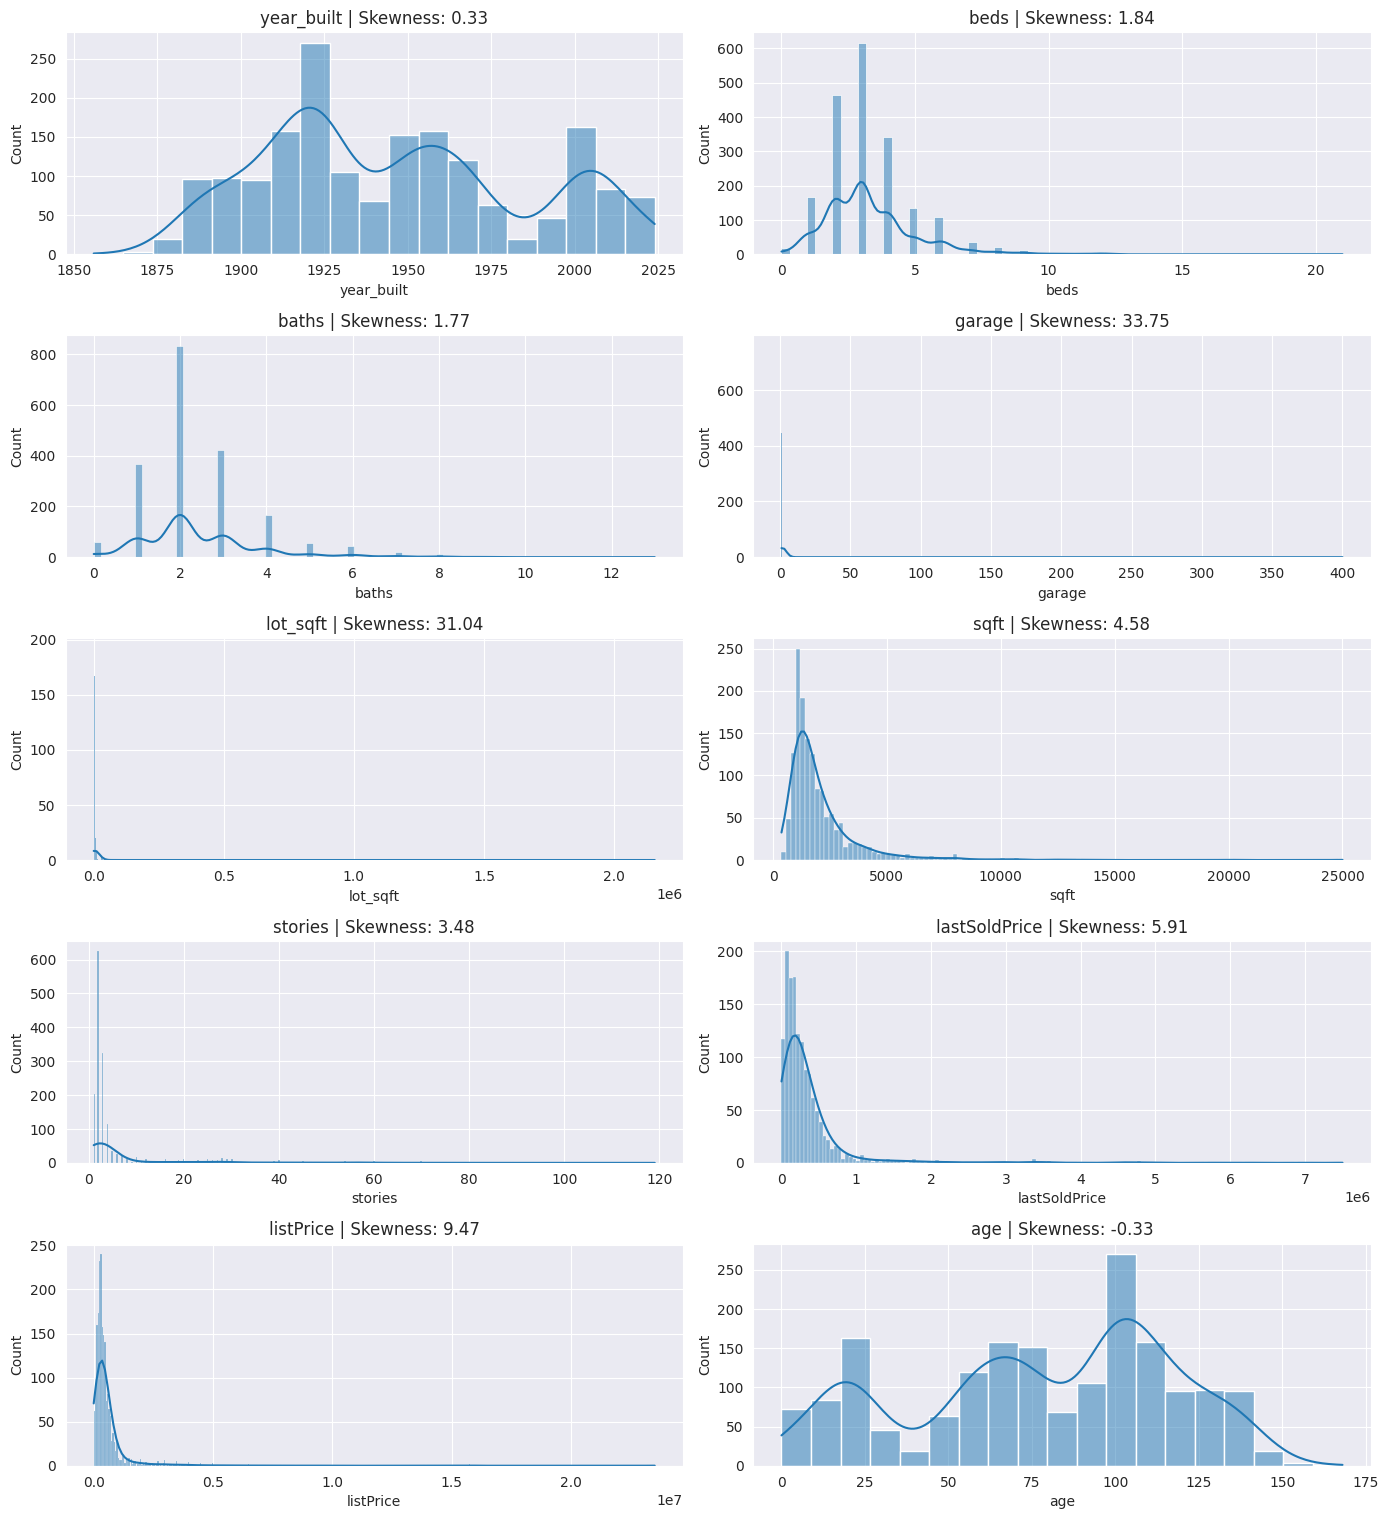

In [ ]:
df_copy = df.copy()

# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df_copy.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_copy[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_copy[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

##### Boxplot to check outliers

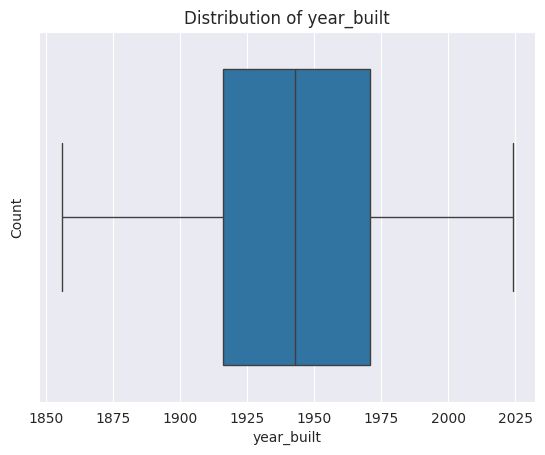

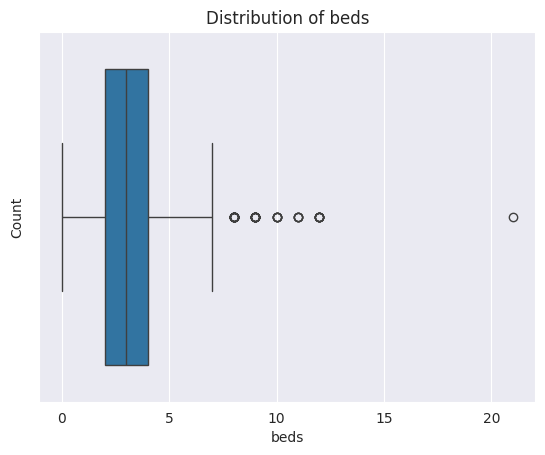

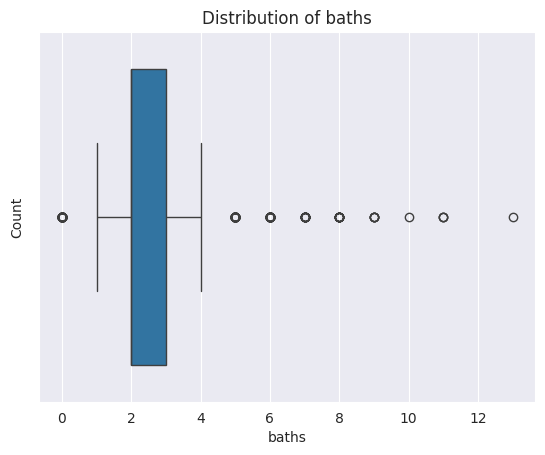

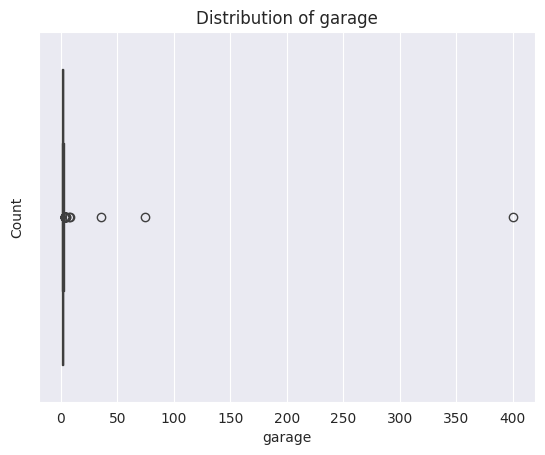

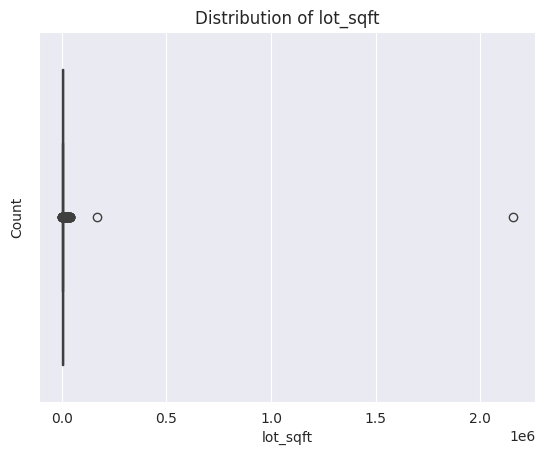

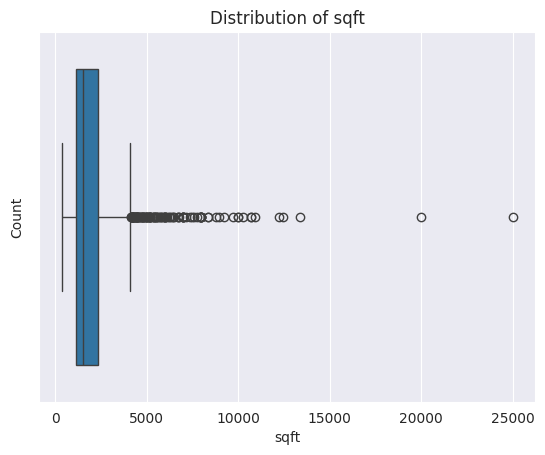

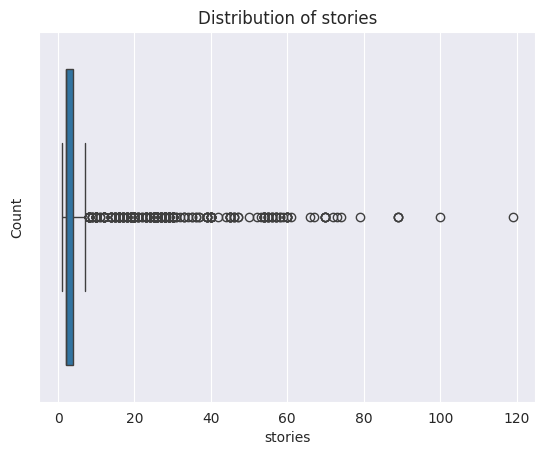

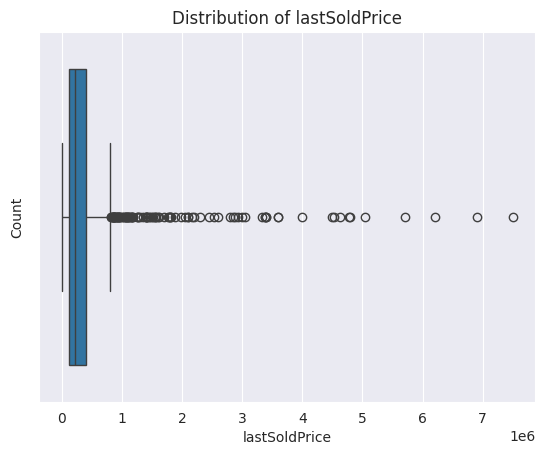

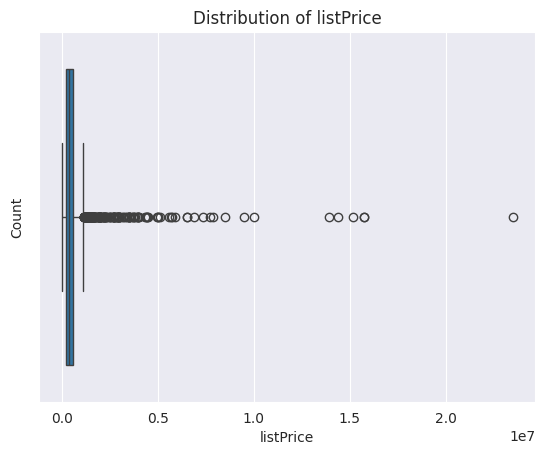

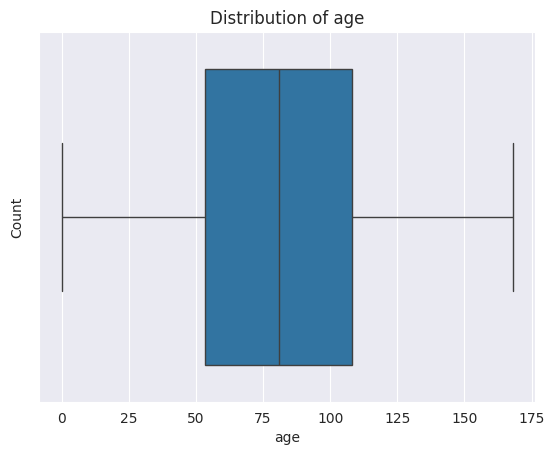

In [ ]:
df_copy = df.copy()  # Create a copy of the DataFrame

cont_features = [feature for feature in df_copy.columns if feature not in ['soldOn', 'type']]  # Select continuous features

for feature in cont_features:  # Loop through the continuous features
  sns.boxplot(data=df_copy, x=feature)  # Create a boxplot for each feature
  plt.xlabel(feature)  # Set the x-axis label
  plt.ylabel("Count")  # Set the y-axis label
  plt.title(f"Distribution of {feature}")  # Set the plot title
  plt.show()  # Display the plot


In [ ]:
df.sample(5)

,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age
63,single_family,1922.0,4.0,3.0,2.0,3125.0,3125.0,2.0,212000.0,2009-10-02,529000.0,102.0
1913,multi_family,1903.0,4.0,2.0,NaN,3100.0,NaN,NaN,NaN,NaT,129000.0,121.0
966,condos,2010.0,4.0,6.0,1.0,NaN,5200.0,72.0,NaN,NaT,3899000.0,14.0
462,condos,NaN,2.0,1.0,NaN,NaN,1000.0,3.0,NaN,NaT,210000.0,NaN
1642,single_family,1928.0,4.0,4.0,2.0,5040.0,3400.0,2.0,52000.0,2018-03-02,228900.0,96.0


##### Some comparison visuals

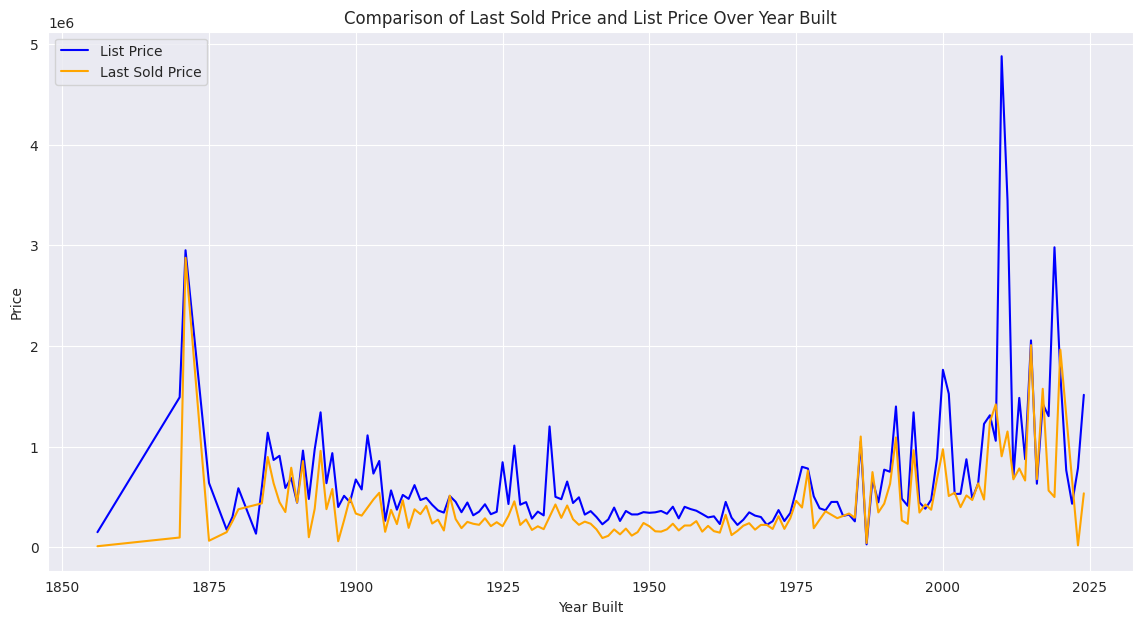

In [ ]:
# Creating a copy of the DataFrame
df_copy = df.copy()

# Plot comparison of lastSoldPrice and listPrice over year_built
plt.figure(figsize=(14, 7))

# Plotting listPrice
sns.lineplot(data=df_copy, x='year_built', y='listPrice', color='blue', label='List Price', ci= None)

# Plotting lastSoldPrice
sns.lineplot(data=df_copy, x='year_built', y='lastSoldPrice', color='orange', label='Last Sold Price', ci= None)

# Adding labels, title, and legend
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Comparison of Last Sold Price and List Price Over Year Built')
plt.legend()
plt.grid(True)
plt.show()


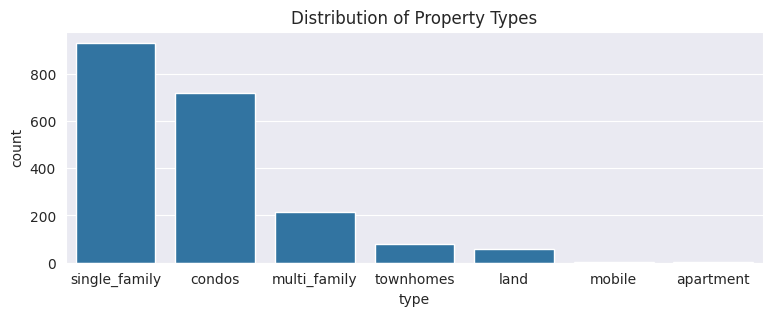

In [ ]:
# Creating a copy of the DataFrame
df_copy = df.copy()

# Distribution of property types
plt.figure(figsize=(9,3))
sns.countplot(data=df_copy, x='type', order=df_copy['type'].value_counts().index)
# plt.xlabel('Property Type')
# plt.ylabel('Count')
plt.title('Distribution of Property Types')
plt.show()

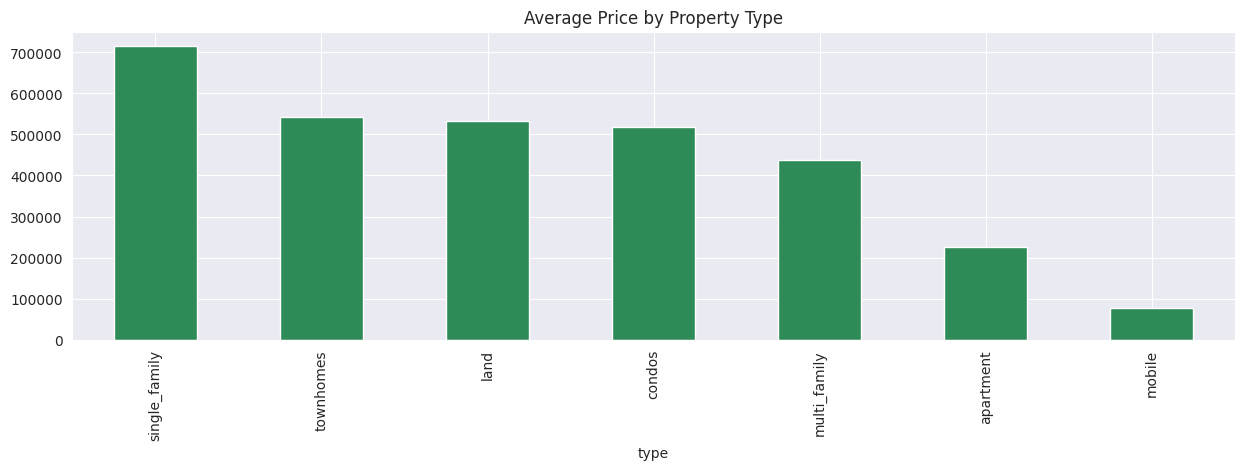

In [ ]:
# Creating a copy of the DataFrame
df_copy = df.copy()

# Average price by property type
avg_price_by_type = df_copy.groupby('type')['listPrice'].mean().sort_values(ascending=False)
avg_price_by_type.plot(kind='bar', figsize=(15, 4), color='seagreen')
plt.title('Average Price by Property Type')
# plt.xlabel('Property Type')
# plt.ylabel('Average Price')
plt.show()

#### type without land

In [ ]:
# Filter the dataframe to exclude rows where the 'type' column has the value 'land'
df_without_land = df[df['type'] != 'land']

# Randomly select and display 5 rows from the filtered dataframe
df_without_land.sample(5)


,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age
485,condos,1975.0,3.0,3.0,1.0,NaN,3000.0,73.0,1800000.0,2023-08-24,2099000.0,49.0
1708,single_family,2008.0,6.0,7.0,4.0,3241.0,8380.0,3.0,5050000.0,2013-04-29,5600000.0,16.0
1507,condos,2020.0,3.0,2.0,1.0,NaN,1850.0,4.0,NaN,NaT,850000.0,4.0
1184,condos,NaN,1.0,1.0,NaN,NaN,NaN,4.0,195000.0,2015-06-01,267500.0,NaN
1049,condos,1905.0,2.0,1.0,NaN,NaN,NaN,3.0,272000.0,2017-06-28,324000.0,119.0


##### imputed the missing values with median

In [ ]:
# Selects numeric columns from the dataframe
numeric_df = df_without_land.select_dtypes(include=np.number)

# Fills missing values with the median of the numeric columns
df_without_land = df_without_land.fillna(numeric_df.median())

# Displays a random sample of 5 rows from the dataframe
df_without_land.sample(5)


,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age
1513,multi_family,1947.0,6.0,3.0,2.0,6250.0,1550.0,2.0,70000.0,1986-10-01,90000.0,77.0
1887,townhomes,2004.0,2.0,3.0,1.0,3751.0,1550.0,2.0,224000.0,NaT,499000.0,20.0
575,single_family,2006.0,5.0,5.0,2.0,2756.0,4461.0,3.0,636000.0,2015-04-03,1100000.0,18.0
1341,condos,1918.0,2.0,2.0,2.0,3751.0,1600.0,12.0,224000.0,NaT,135000.0,106.0
1618,single_family,1891.0,6.0,6.0,2.0,2357.0,6300.0,3.0,1565000.0,2009-01-08,2900000.0,133.0


In [ ]:
df_without_land.isna().sum()

,0
type,0
year_built,0
beds,0
baths,0
garage,0
lot_sqft,0
sqft,0
stories,0
lastSoldPrice,0
soldOn,565


#### type with land

In [ ]:
# Filter the DataFrame to include only rows where the 'type' column has the value 'land'
df_with_land = df[df['type'] == 'land']

# Randomly select 5 rows from the filtered DataFrame and display them
if not df_with_land.empty:  # Check if df_with_land is empty
    df_with_land.sample(5)
else:
    print("df_with_land is empty. No samples to display.")

##### imputed missing values with '0'

In [ ]:
# Fill missing values with 0
df_with_land = df_with_land.fillna(0)

# Sample 5 random rows from the DataFrame
if not df_with_land.empty:
    display(df_with_land.sample(5))
else:
    print("df_with_land is empty. No samples to display.")

,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age
1690,land,0.0,0.0,0.0,0.0,168577.0,0.0,0.0,0.0,0,325000.0,0.0
630,land,0.0,0.0,0.0,0.0,5663.0,0.0,0.0,34000.0,2004-08-06 00:00:00,39000.0,0.0
235,land,1969.0,0.0,0.0,0.0,0.0,0.0,0.0,210000.0,2021-07-30 00:00:00,38000.0,55.0
646,land,0.0,0.0,0.0,0.0,3049.0,0.0,0.0,545000.0,2022-06-30 00:00:00,235000.0,0.0
635,land,0.0,0.0,0.0,0.0,2614.0,0.0,0.0,27000.0,2007-08-06 00:00:00,25000.0,0.0


In [ ]:
df_with_land.isna().sum()

,0
type,0
year_built,0
beds,0
baths,0
garage,0
lot_sqft,0
sqft,0
stories,0
lastSoldPrice,0
soldOn,0


#### CONCAT(df_without_land + df_with_land)

In [ ]:
df_concat = pd.concat([df_without_land, df_with_land], axis=0)  # Concatenate dataframes vertically
df_concat.sample(5)  # Display 5 random rows from the concatenated dataframe


,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age
1279,single_family,1960.0,5.0,2.0,2.0,6250.0,1512.0,2.0,215000.0,2006-05-18 00:00:00,337000.0,64.0
432,multi_family,1887.0,4.0,2.0,2.0,4356.0,1550.0,2.0,305000.0,2018-08-10 00:00:00,475000.0,137.0
803,multi_family,1915.0,8.0,3.0,2.0,3751.0,1550.0,2.0,15000.0,2010-05-14 00:00:00,239900.0,109.0
872,single_family,1900.0,4.0,4.0,2.0,5314.0,4812.0,3.0,40000.0,1991-11-29 00:00:00,710000.0,124.0
1037,single_family,1926.0,5.0,4.0,2.0,3751.0,1550.0,2.0,224000.0,NaT,725000.0,98.0


In [ ]:
# Define the number of bins (ranges)
num_bins = 5

# Create the 'age_range' column directly using pd.cut()
df_concat['age_range'] = pd.cut(
    df_concat['age'],
    bins=num_bins,
    labels=[f"{int(interval.left)} - {int(interval.right)}" for interval in pd.cut(df_concat['age'], bins=num_bins).cat.categories],
    include_lowest=True
)

# Display a random sample of 5 rows from the dataframe to view the data
df_concat.sample(5)

,type,year_built,beds,baths,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,age,age_range
1921,single_family,1900.0,4.0,3.0,2.0,3751.0,1535.0,2.0,47000.0,1981-09-30 00:00:00,790000.0,124.0,100 - 134
1824,single_family,1937.0,2.0,2.0,1.0,4050.0,1307.0,1.0,79500.0,2000-07-25 00:00:00,245000.0,87.0,67 - 100
1904,single_family,2024.0,3.0,4.0,2.0,8712.0,2736.0,2.0,224000.0,NaT,489900.0,0.0,0 - 33
869,single_family,1918.0,5.0,4.0,1.0,5056.0,2015.0,2.0,143000.0,1998-11-04 00:00:00,314200.0,106.0,100 - 134
1640,condos,1921.0,2.0,1.0,2.0,3751.0,1000.0,3.0,133000.0,2017-03-02 00:00:00,200000.0,103.0,100 - 134


In [ ]:
# Checking for missing values in the dataframe and summing them for each column
df_concat.isna().sum()


,0
type,0
year_built,0
beds,0
baths,0
garage,0
lot_sqft,0
sqft,0
stories,0
lastSoldPrice,0
soldOn,565


In [ ]:
# Selects specific columns from the dataframe
df_concat = df_concat[['type', 'beds', 'baths', 'garage', 'lot_sqft', 'sqft', 'stories', 'listPrice', 'age_range']]

# Displays a random sample of 5 rows from the dataframe
df_concat.sample(5)


,type,beds,baths,garage,lot_sqft,sqft,stories,listPrice,age_range
1655,condos,2.0,2.0,2.0,3751.0,1800.0,12.0,359000.0,67 - 100
1757,condos,1.0,1.0,1.0,3751.0,1550.0,19.0,189900.0,67 - 100
1226,multi_family,5.0,2.0,2.0,3751.0,1550.0,2.0,52900.0,100 - 134
918,single_family,4.0,2.0,2.0,3125.0,1150.0,1.0,32900.0,67 - 100
1189,single_family,4.0,2.0,1.0,3751.0,1900.0,2.0,240000.0,67 - 100


##### Label Encoding - 'object' type column

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le =LabelEncoder()  # Initialize LabelEncoder
# df_concat['type'] = le.fit_transform(df_concat['type'])  # Encode 'type' column into numeric values
# df_concat.sample(5)  # Display a random sample of 5 rows


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'type' and 'age_range' columns separately
for col in ['type', 'age_range']:
    df_concat[col] = le.fit_transform(df_concat[col])

# Display a random sample of 5 rows
df_concat.sample(5)

,type,beds,baths,garage,lot_sqft,sqft,stories,listPrice,age_range
86,1,2.0,1.0,1.0,3751.0,1400.0,3.0,399000.0,4
1132,1,3.0,3.0,1.0,3751.0,2100.0,2.0,799000.0,0
1631,5,4.0,2.0,2.0,10175.0,3200.0,2.0,475000.0,3
476,1,2.0,2.0,2.0,3751.0,1100.0,16.0,179900.0,3
853,6,3.0,3.0,2.0,3751.0,2500.0,3.0,549500.0,0


In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 1690
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       1998 non-null   int64  
 1   beds       1998 non-null   float64
 2   baths      1998 non-null   float64
 3   garage     1998 non-null   float64
 4   lot_sqft   1998 non-null   float64
 5   sqft       1998 non-null   float64
 6   stories    1998 non-null   float64
 7   listPrice  1998 non-null   float64
 8   age_range  1998 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 156.1 KB


In [ ]:
df_concat[['beds', 'baths', 'garage', 'stories']] = df_concat[['beds', 'baths', 'garage', 'stories']].astype('int')
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 1690
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       1998 non-null   int64  
 1   beds       1998 non-null   int64  
 2   baths      1998 non-null   int64  
 3   garage     1998 non-null   int64  
 4   lot_sqft   1998 non-null   float64
 5   sqft       1998 non-null   float64
 6   stories    1998 non-null   int64  
 7   listPrice  1998 non-null   float64
 8   age_range  1998 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 156.1 KB


#### Export

In [ ]:
df_concat.to_csv('/content/clean_data/data_RealEstateDataChicago.csv', index=False)

#### Reading the clean data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Read the CSV file containing real estate data into a pandas DataFrame
data = pd.read_csv('/content/data_RealEstateDataChicago.csv')

# Display a random sample of 5 rows from the DataFrame
# This helps in quickly inspecting the structure and content of the data
data.sample(5)

,type,beds,baths,garage,lot_sqft,sqft,stories,listPrice,age_range
1803,1,2,2,2,3751.0,1550.0,24,309000.0,4
801,5,5,5,2,3751.0,2742.0,3,610000.0,1
639,1,3,3,2,3751.0,2400.0,3,295000.0,1
177,1,1,1,1,3751.0,735.0,26,200000.0,3
1401,1,1,1,2,3751.0,750.0,12,44900.0,3


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       2000 non-null   int64  
 1   beds       2000 non-null   int64  
 2   baths      2000 non-null   int64  
 3   garage     2000 non-null   int64  
 4   lot_sqft   2000 non-null   float64
 5   sqft       2000 non-null   float64
 6   stories    2000 non-null   int64  
 7   listPrice  2000 non-null   float64
 8   age_range  2000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 140.8 KB


In [ ]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
type,2000.0,3.4065,1.903173e+00,0.0,1.00,5.0,5.0,6.0
beds,2000.0,3.1900,1.820593e+00,0.0,2.00,3.0,4.0,21.0
baths,2000.0,2.4395,1.456159e+00,0.0,2.00,2.0,3.0,13.0
garage,2000.0,2.0245,9.106831e+00,0.0,1.00,2.0,2.0,400.0
lot_sqft,2000.0,5430.6060,4.833965e+04,0.0,3750.00,3751.0,3751.0,2156000.0
sqft,2000.0,1879.6550,1.492902e+03,0.0,1215.25,1550.0,2000.0,25000.0
stories,2000.0,6.1390,1.193352e+01,0.0,2.00,2.0,3.0,119.0
listPrice,2000.0,600299.2335,1.200734e+06,0.0,225000.00,349900.0,575000.0,23500000.0
age_range,2000.0,2.1255,1.585562e+00,0.0,1.00,2.0,4.0,4.0


In [ ]:
data.isnull().sum()


,0
type,0
beds,0
baths,0
garage,0
lot_sqft,0
sqft,0
stories,0
listPrice,0
age_range,0


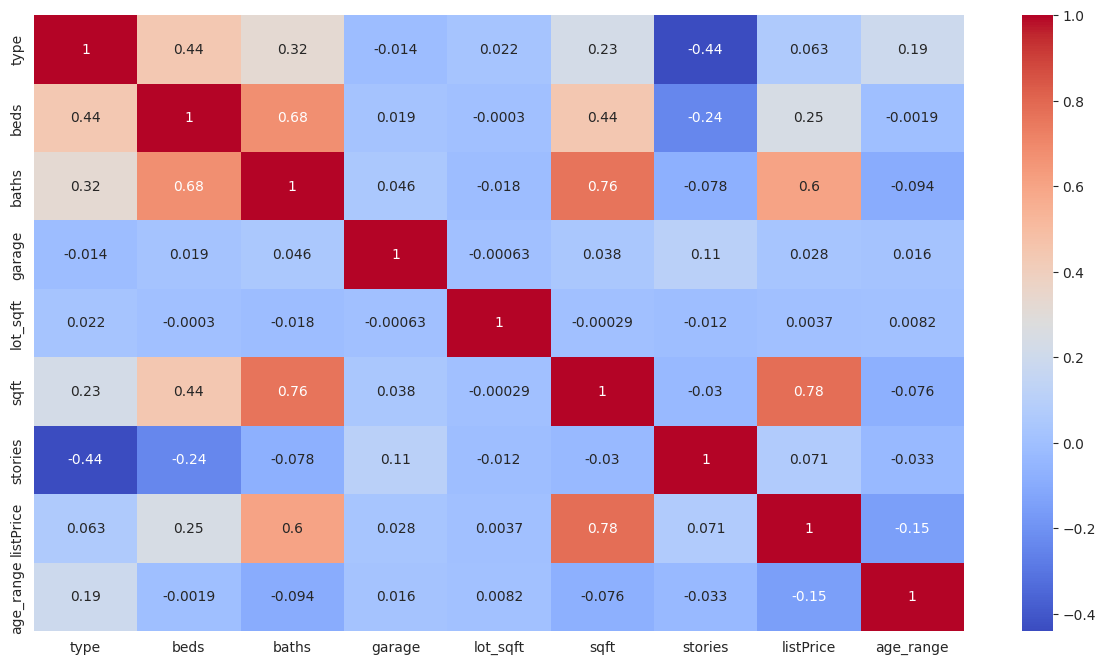

In [ ]:
corr_matrix = data.corr()  # Calculate correlation matrix

# Set the figure size
plt.figure(figsize=(15, 8))

# Create a heatmap from the correlation matrix with annotations and a color map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

###### Explanation of Correlation

This is a correlation matrix for a set of variables in a DataFrame. The values represent the correlation coefficients between pairs of variables, indicating the strength and direction of their linear relationship. The values range from -1 to 1, where:

- **1** means a perfect positive correlation (as one variable increases, the other also increases).
- **-1** means a perfect negative correlation (as one variable increases, the other decreases).
- **0** means no linear correlation between the variables.

Let's break down the key relationships in this matrix:

### 1. **`beds` and `baths` (0.441)**:
   - A moderate positive correlation. This suggests that as the number of beds in a property increases, the number of bathrooms tends to increase as well, though not perfectly.

### 2. **`beds` and `garage` (0.019)**:
   - A very weak positive correlation, close to 0. This suggests there's almost no linear relationship between the number of beds and the presence or size of a garage.

### 3. **`sqft` and `baths` (0.763)**:
   - A strong positive correlation. Larger properties (by square footage) tend to have more bathrooms, which makes sense in terms of typical property design.

### 4. **`listPrice` and `sqft` (0.777)**:
   - A strong positive correlation. Larger properties are priced higher, which is expected, as square footage directly impacts property value.

### 5. **`age` and `listPrice` (-0.109)**:
   - A weak negative correlation. Older properties tend to have slightly lower prices, although the correlation is weak, suggesting other factors (such as location or condition) also play significant roles in pricing.

### 6. **`stories` and `sqft` (-0.0297)**:
   - A very weak negative correlation. The number of stories in a property is almost independent of its square footage, indicating that properties with more stories may or may not have more square footage.

### 7. **`lot_sqft` and `sqft` (-0.000286)**:
   - A very weak negative correlation. The lot size and the property's actual square footage are almost unrelated in this case, suggesting that properties with larger lots do not necessarily have larger structures.

### 8. **`age` and `stories` (-0.237)**:
   - A moderate negative correlation. Older properties tend to have fewer stories, possibly because multi-story designs became more common in newer developments.

### 9. **`garage` and `stories` (0.105)**:
   - A weak positive correlation. There’s a small tendency for properties with more stories to also have a garage, though it's not a strong relationship.

### 10. **`baths` and `age` (0.076)**:
   - A weak positive correlation. Older properties tend to have slightly fewer bathrooms, but this relationship is weak and not significant.

### Summary of Key Points:
- **Strong correlations**: Square footage (`sqft`) is strongly correlated with both bathrooms (`baths`) and list price (`listPrice`).
- **Moderate correlations**: Beds (`beds`) and bathrooms (`baths`) are moderately correlated. Similarly, age (`age`) and stories (`stories`) have a moderate negative correlation.
- **Weak correlations**: There are several weak or near-zero correlations, such as between garage and number of beds, or between lot size (`lot_sqft`) and square footage.

In essence, this matrix shows how various features (e.g., number of bedrooms, bathrooms, square footage, and price) relate to one another. Strong positive correlations are expected between square footage and price, while weak or insignificant correlations are found in areas like garage size and age of property.

<Axes: xlabel='listPrice', ylabel='Count'>

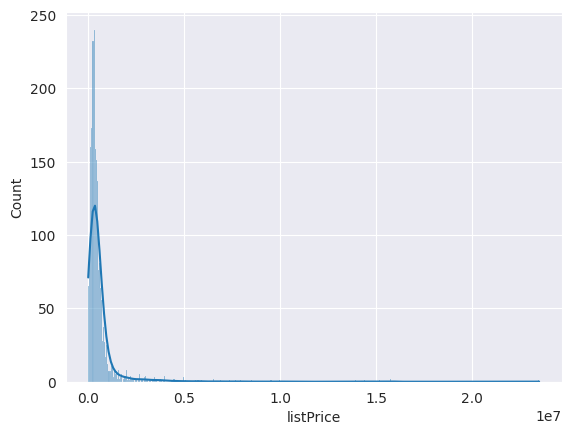

In [ ]:
sns.histplot(data['listPrice'], kde=True)


<Axes: ylabel='listPrice'>

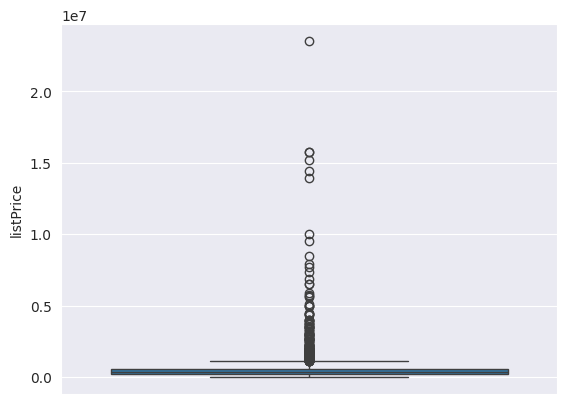

In [ ]:
sns.boxplot(data['listPrice'])


KeyboardInterrupt: 

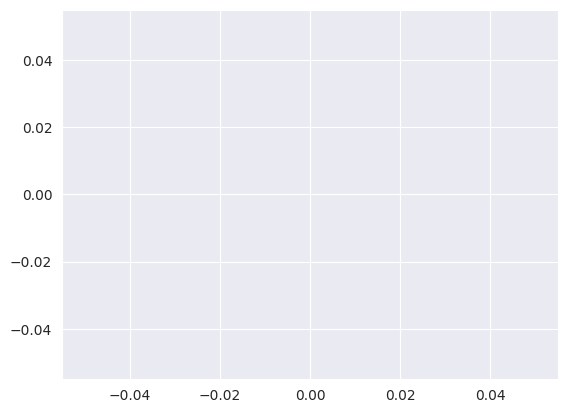

In [ ]:
# sns.histplot(data['lot_sqft'], kde=True)

<Axes: ylabel='lot_sqft'>

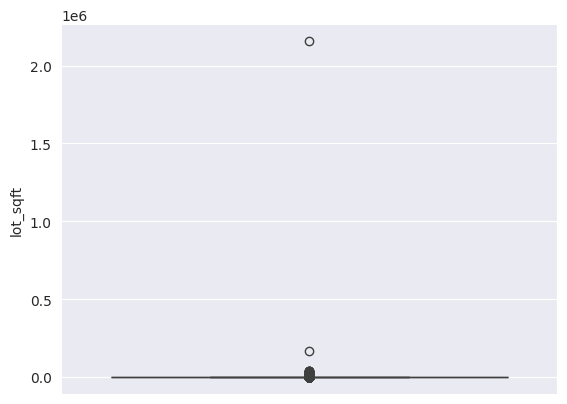

In [ ]:
sns.boxplot(data['lot_sqft'])

<Axes: xlabel='sqft', ylabel='Count'>

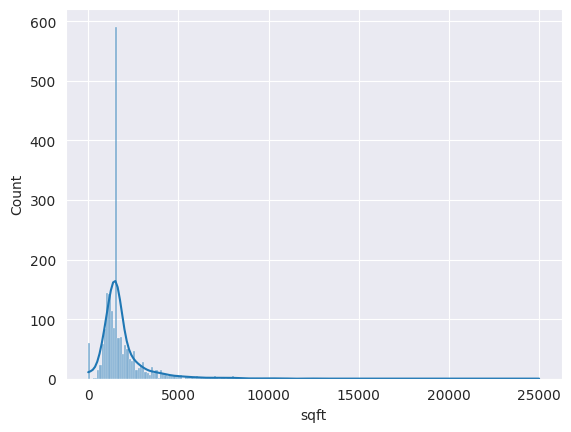

In [ ]:
sns.histplot(data['sqft'], kde=True)

<Axes: ylabel='sqft'>

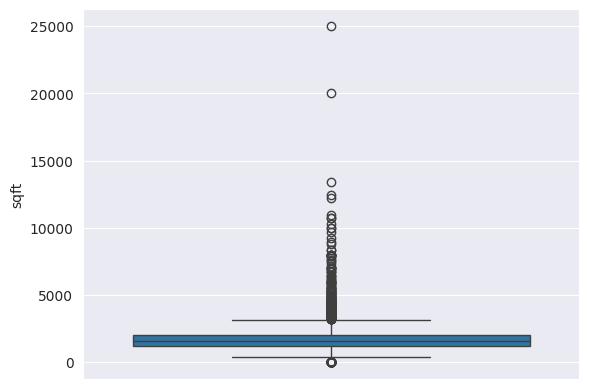

In [ ]:
sns.boxplot(data['sqft'])

##### Finding The Top Features

In [ ]:
# #Using the SelectKBest library to run a chi-squared statistical test & select the top 3 features that are most related to the output

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# X = data.drop('listPrice', axis = 1)
# y = data['listPrice']

# best_features= SelectKBest(score_func=chi2, k=3) #function that select the top 3 features.
# fit= best_features.fit(X,y)

# #Creating dataframes for the features and the score of each feature.
# scores= pd.DataFrame(fit.scores_)
# column= pd.DataFrame(X.columns)

In [ ]:
# #Create a dataframe that combines all the features and their corresponding scores.
# features_scores= pd.concat([column, scores], axis=1)
# features_scores.columns= ['Features', 'Score']
# features_scores.sort_values(by = 'Score')

##### Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['listPrice'], axis = 1)
y = data['listPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26, shuffle = True, stratify = None)

##### Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(robust_scaler.fit_transform(data), columns = data.columns)
df_robust.sample(5)

,type,beds,baths,garage,lot_sqft,sqft,stories,listPrice,age_range
820,-1.0,0.5,0.0,0.0,0.0,0.000000,1.0,0.100000,-0.333333
714,-1.0,-0.5,0.0,0.0,0.0,0.191144,5.0,-0.271143,0.666667
174,-1.0,-1.0,-1.0,-1.0,0.0,-0.955718,38.0,-0.285714,0.333333
691,0.0,0.0,0.0,0.0,-1.0,-0.446002,-1.0,0.186000,0.333333
1403,0.0,-0.5,1.0,0.0,1563.0,-0.507168,0.0,-0.544000,-0.333333


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)
X_train

array([[0.        , 0.0952381 , 0.07692308, ..., 0.036     , 0.01680672,
        0.25      ],
       [0.        , 0.0952381 , 0.15384615, ..., 0.062     , 0.03361345,
        0.        ],
       [0.        , 0.14285714, 0.15384615, ..., 0.062     , 0.02521008,
        1.        ],
       ...,
       [0.8       , 0.23809524, 0.15384615, ..., 0.072     , 0.01680672,
        0.25      ],
       [0.8       , 0.14285714, 0.15384615, ..., 0.0408    , 0.00840336,
        0.75      ],
       [0.        , 0.04761905, 0.07692308, ..., 0.04      , 0.09243697,
        0.25      ]])

In [ ]:
X_test = scaler.transform(X_test)
X_test

array([[0.8       , 0.19047619, 0.23076923, ..., 0.05832   , 0.01680672,
        1.        ],
       [0.        , 0.04761905, 0.07692308, ..., 0.03472   , 0.32773109,
        0.75      ],
       [0.        , 0.0952381 , 0.15384615, ..., 0.04      , 0.02521008,
        0.        ],
       ...,
       [0.        , 0.04761905, 0.07692308, ..., 0.03456   , 0.20168067,
        0.        ],
       [0.8       , 0.0952381 , 0.15384615, ..., 0.04088   , 0.00840336,
        0.75      ],
       [0.        , 0.0952381 , 0.07692308, ..., 0.04      , 0.02521008,
        1.        ]])

##### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

368574.7366618559


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

547838502573.7114


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

740161.1328445391


In [ ]:
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.5375865664785657


In [ ]:
y_np = np.array(y_test)
# y_np

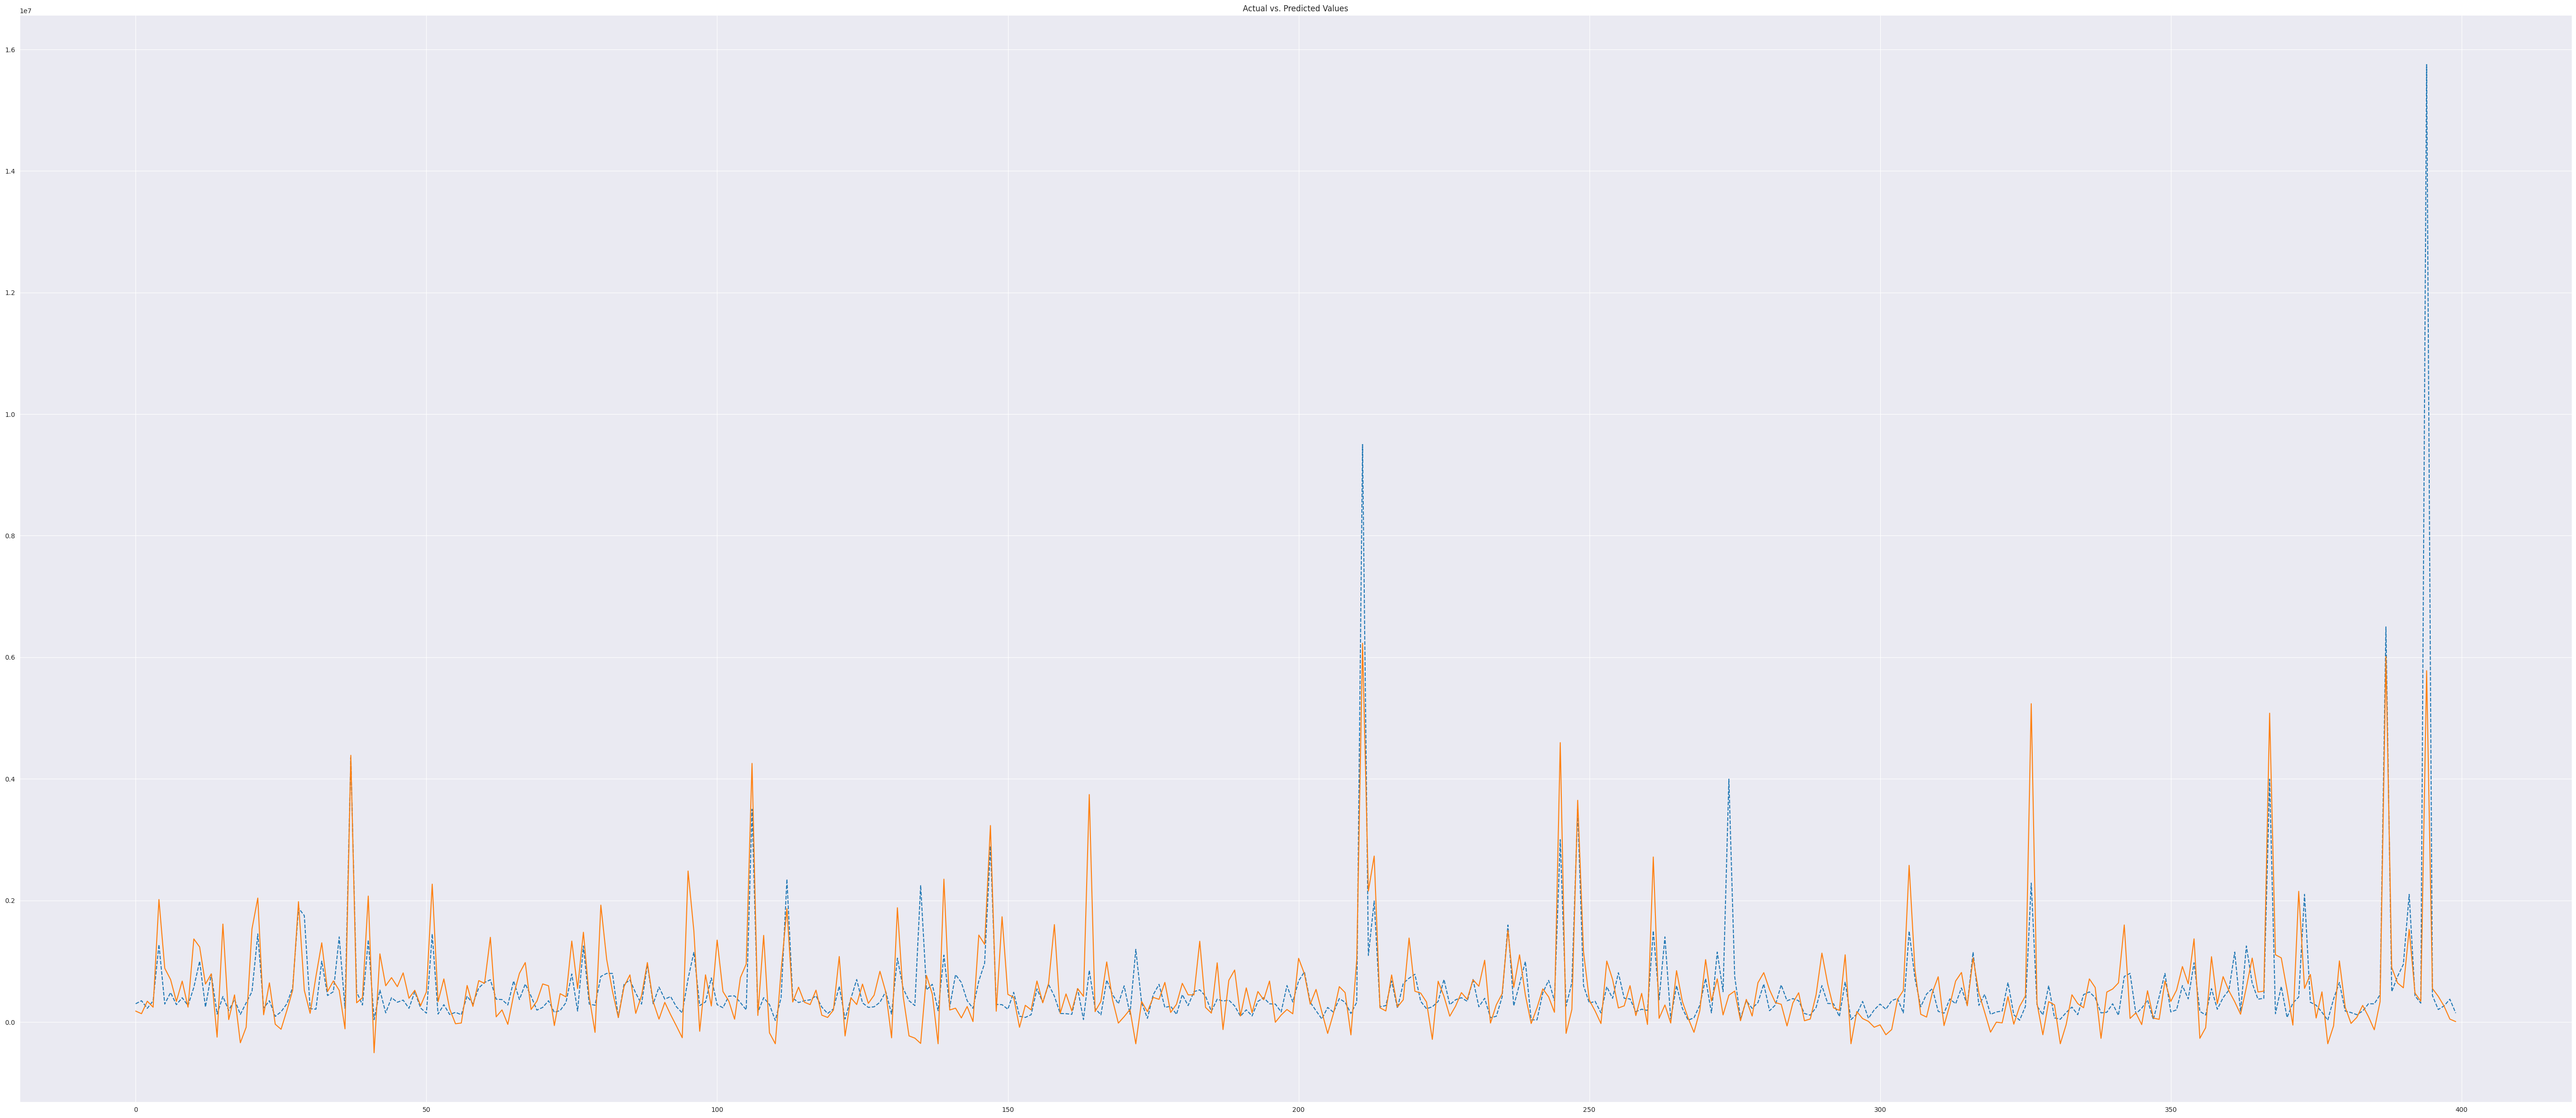

In [ ]:
plt.figure(figsize=(70, 30))
plt.plot(y_np, '--')
plt.plot(y_pred, '-')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

###### hyperparameter tuning - RandomizedSearchCV

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
model = LinearRegression()
# (*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

In [ ]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

In [ ]:
random_search = RandomizedSearchCV(model, param_space, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=100,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [ ]:
# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}


In [ ]:
# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

Best Score: 0.4861043925711777


###### hyperparameter tuning - GridSearchCV

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
# (*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

In [ ]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}
grid_search = GridSearchCV(model, param_space, cv=5)

grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.4861043925711777


In [ ]:
# general LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 1455813088550.403
Mean Absolute Error: 1040322.7531409472
R-squared: -0.22880652907643828


In [ ]:
# hyperparameter tuning with RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
model = LinearRegression()

# model.get_params()

param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

random_search = RandomizedSearchCV(model, param_space, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 0.4861043925711777


In [ ]:
# hyperparameter tuning with GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
model = LinearRegression()

# model.get_params()

param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}
grid_search = GridSearchCV(model, param_space, cv=5)

grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.4861043925711777


##### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = Ridge(alpha=1.0, random_state=26)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 1426374129396.7898
Mean Absolute Error: 1032729.9294595583
R-squared: -0.2039580196752795


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = Ridge(tol= 0.0001, solver= 'auto', random_state= 42, positive= False, max_iter= None, fit_intercept= True, copy_X= True, alpha= 30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 1052031559349.6262
Mean Absolute Error: 691902.3359613492
R-squared: 0.11201289568669104


###### hyperparameter tuning - RandomizedSearchCV

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
model = Ridge()
# def __init__(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [ ]:
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [ ]:
param_space = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
               'copy_X': [True, False],
               'fit_intercept': [True, False],
               'max_iter': [None],
               'positive': [True, False],
               'random_state': [42],
               'solver': ['auto'],
               'tol': [0.0001]}

random_search = RandomizedSearchCV(model, param_space, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

Best Hyperparameters: {'tol': 0.0001, 'solver': 'auto', 'random_state': 42, 'positive': False, 'max_iter': None, 'fit_intercept': True, 'copy_X': True, 'alpha': 1}
Best Score: 0.5270054778142811


###### hyperparameter tuning - GridSearchCV

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
model = Ridge()
# def __init__(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [ ]:
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [ ]:
param_space = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
               'copy_X': [True, False],
               'fit_intercept': [True, False],
               'max_iter': [None],
               'positive': [True, False],
               'random_state': [42],
               'solver': ['auto'],
               'tol': [0.0001]}

grid_search = GridSearchCV(model, param_space, cv=5)
grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 42, 'solver': 'auto', 'tol': 0.0001}
Best Score: 0.5270054778142811


##### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = Lasso(alpha=1.0, random_state=26)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 1455800110475.5872
Mean Absolute Error: 1040317.6263900799
R-squared: -0.22879557468731093


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
model = Lasso()

In [ ]:
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
param_space = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
               'copy_X': [True, False],
               'fit_intercept': [True, False],
               'max_iter': [1000],
               'positive': [True, False],
               'random_state': [0,42],
              #  'solver': ['auto', 'cyclic'],
               'tol': [0.0001],
               'warm_start': [True, False]}

grid_search = GridSearchCV(model, param_space, cv=5)
grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'alpha': 100, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'random_state': 0, 'tol': 0.0001, 'warm_start': True}
Best Score: 0.48853278383457466


##### Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = SVR(kernel='linear', C=1.0, epsilon=0.2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 1231570960185.3486
Mean Absolute Error: 364966.9710285801
R-squared: -0.03953072602444818


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
model = SVR()

In [ ]:
model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

param_space = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types to consider
    'degree': [2, 3, 4],  # Degree of the polynomial kernel function (used with 'poly' kernel)
    'gamma': ['scale', 'auto', 0.01, 0.1, 1.0],  # Kernel coefficient
    'coef0': [0.0, 0.5, 1.0],  # Independent term in kernel function (for 'poly' and 'sigmoid')
    'epsilon': [0.01, 0.1, 0.2],  # Epsilon in the epsilon-SVR model
    'shrinking': [True, False],  # Whether to use the shrinking heuristic
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criterion
    'max_iter': [-1]  # No limit on iterations
}


grid_search = GridSearchCV(model, param_space, cv=3)
grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

##### K-Nearest Neighbors(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 1195451207140.6953
Mean Absolute Error: 575801.753
R-squared: -0.00904316637893543


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
model = KNeighborsRegressor()

In [ ]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
param_space = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Try different numbers of neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Metrics to test
    'p': [1, 2],  # Power parameter for Minkowski metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm choices
    'leaf_size': [10, 30, 50],  # Leaf size for tree-based algorithms
}


grid_search = GridSearchCV(model, param_space, cv=5)
grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'algorithm': 'brute', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best Score: 0.6172081413799527


##### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(bootstrap = True, max_depth= 20, max_features= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 399235207720.3678
Mean Absolute Error: 240765.01485088497
R-squared: 0.6630179837354917


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = RandomForestRegressor(bootstrap = True, max_depth= None, max_features= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 388133523125.5065
Mean Absolute Error: 242883.85020063177
R-squared: 0.6723885702628436


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = RandomForestRegressor(bootstrap = True, max_depth= None, max_features= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 405615841224.6546
Mean Absolute Error: 241352.02966550703
R-squared: 0.6576322895338284


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestRegressor()

# model.get_params()

param_space = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state': [0,42,50]
}


random_search = RandomizedSearchCV(model, param_space, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

##### XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = XGBRegressor(max_depth=8, n_estimators=250, random_state=2022, learning_rate=0.08, n_jobs=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 402220782211.036
Mean Absolute Error: 237681.530826416
R-squared: 0.6604979532068267


In [ ]:
!pip install --upgrade xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
!pip show xgboost scikit-learn

Name: xgboost
Version: 2.1.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 
---
Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documenta

In [ ]:
!pip install scikit-learn==1.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.1.3 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.1.3 which is incompatible.
bigframes 1.31.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()

param_space = {
    'n_estimators': [100, 200, 500],           # Number of boosting rounds
    'max_depth': [3, 6, 10, None],             # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],              # Subsample ratio of the training data
    'colsample_bytree': [0.6, 0.8, 1.0],       # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1, 5],                        # Minimum loss reduction required to make a split
    'min_child_weight': [1, 3, 5],             # Minimum sum of instance weights needed in a child
    'reg_alpha': [0, 0.1, 1],                  # L1 regularization term on weights
    'reg_lambda': [1, 1.5, 2],                 # L2 regularization term on weights
    'scale_pos_weight': [1, 2, 5],             # Balancing positive and negative weights
    'tree_method': ['auto', 'exact', 'hist'],  # Tree construction algorithms
    'booster': ['gbtree', 'gblinear', 'dart'] # Booster type
}



grid_search = GridSearchCV(model, param_space, cv=5)
grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

AttributeError: 'super' object has no attribute '__sklearn_tags__'

##### All ML Models together

In [ ]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500

In [ ]:
models = dict()
models['Linear Regression'] = LinearRegression()
models['Random Forest'] = RandomForestRegressor(n_estimators=550, bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=2022)
models['Support Vector Machine'] = SVR(kernel='rbf', gamma='scale')
models['k-Nearest Neighbors'] = KNeighborsRegressor()
models['XGBoost'] = XGBRegressor(max_depth=8, n_estimators=250, random_state=2022, learning_rate=0.08, n_jobs=5)
models['AdaBoost'] = AdaBoostRegressor(learning_rate=0.08, n_estimators=250, random_state=2022)


In [ ]:
for model in models:

    models[model].fit(X_train, y_train)
    print(model + " model fitting completed.")

Linear Regression model fitting completed.
Random Forest model fitting completed.
Support Vector Machine model fitting completed.
k-Nearest Neighbors model fitting completed.
XGBoost model fitting completed.
AdaBoost model fitting completed.


In [ ]:
print("Test Set Prediction:\n")

for x in models:
    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

Test Set Prediction:

--------------------Linear Regression--------------------
Mean Squared Error: 1455813088550.403
Mean Absolute Error: 1040322.7531409472
R-squared: -0.22880652907643828
--------------------Random Forest--------------------
Mean Squared Error: 1643152605494.3774
Mean Absolute Error: 1047303.2682170899
R-squared: -0.38693398608673557
--------------------Support Vector Machine--------------------
Mean Squared Error: 1231586003353.8403
Mean Absolute Error: 364977.09584046254
R-squared: -0.03954342349488993
--------------------k-Nearest Neighbors--------------------
Mean Squared Error: 1195451207140.6953
Mean Absolute Error: 575801.753
R-squared: -0.00904316637893543
--------------------XGBoost--------------------
Mean Squared Error: 1256176347091.1406
Mean Absolute Error: 798433.204375
R-squared: -0.06029936749228604
--------------------AdaBoost--------------------
Mean Squared Error: 1294645702039.557
Mean Absolute Error: 854469.0700892496
R-squared: -0.09277015299473

In [ ]:
print('Summary of R-squared Score: -\n')
for i in models:
    model = models[i]
    y_pred = model.predict(X_test)  # Get predictions
    r2 = r2_score(y_test, y_pred)   # Calculate R-squared
    print(i + ' Model: ', round(r2, 4))  # Print R-squared using the built-in round function

Summary of R-squared Score: -

Linear Regression Model:  -0.2288
Random Forest Model:  -0.4008
Support Vector Machine Model:  -0.0395
k-Nearest Neighbors Model:  -0.009
XGBoost Model:  -0.0603
AdaBoost Model:  -0.0928
